# A CDC Halloween 🎃 Designing Personal Predictions
<p>Harshika Jain<br>
Human AI Interaction HW3 Part 2<br>
Professors: Chinmay Kulkarni, Mary Beth Kery</p>
P.S. %matplotlib notebook has to be run again sometimes to display all the figures.

<h2>Brief</h2>
<p>The Center for Disease Control and Prevention (CDC) is a federal public health and safety agency of the United States. This is an exploration of their public death dataset which records cause-of-death of everyone deceased in the United States. The CDC’s goal is to raise public awareness of health, so the dataset will only include deaths by natural causes or accidents, to help current residents of the country take better precautions about their own health.</p>
<hr>
<h2>Designing Personal Predictions</h2>
<p>The goal of Part 2 is to start designing an interactive interface, where a user that comes to the CDC visualization can put in their own information, and see the most common causes of death for their attributes (like age, gender, and so on)</p>

<h2>A. Design for Personas</h2>
<p>Design for personas. For each of the fictional users given, create a single visualization that shows the most likely cause of death for that user. To experiment with design choices, make each user/visualization pair a different visualization that represents different design choices (e.g. you could try a different plot type for some users). [20 Points]</p>
<ul>
    <li>Miles is a young black male college student. He is 20 years old and lives a healthy lifestyle. He doesn’t smoke or use drugs, but does drink alcohol in social settings. </li>
    <li>Jonas is a 72 year old man, immigrated from Germany to the United States in his thirties, and has a highschool level education. His wife passed away last year.</li>
    <li>Alma is a 36 year old woman with two kids. She is hispanic and co-parents her kids with a long term romantic partner but does not believe in marriage. She has an accounting degree and a strong family history of breast cancer.</li>
</ul>

In [1]:
# import widgets for jupyternotebook
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import mplcursors

from vega_datasets import data
import altair as alt
alt.renderers.enable('notebook')

# import other packages for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("data/death_causes.csv") # create dataframe
corr = data.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,age,education,month_of_death,day_of_week_of_death
Unnamed: 0,1,0.0207863,0.0167441,0.0347676,0.00398752
age,0.0207863,1,0.0180792,-0.0176715,0.000795143
education,0.0167441,0.0180792,1,0.0479605,0.000491207
month_of_death,0.0347676,-0.0176715,0.0479605,1,-0.0124744
day_of_week_of_death,0.00398752,0.000795143,0.000491207,-0.0124744,1


In [3]:
data.race.unique()

array(['White', 'Black', 'Korean', 'Vietnamese', 'Indian',
       'Native American', 'Hawaiian', 'Chinese', 'Japanese',
       'other Asian or Pacific Islander', 'Filipino', 'Samoan',
       'Guamanian'], dtype=object)

<h2>A1: Miles</h2>
<h3>Visualization 1: </h3>
<p>College students are typically aged between 18 and 24 years <a href = https://blog.campus.app/student-demographics-in-higher-education>(source reference) </a>, thus records between 18 and 24 years were chosen from the whole dataset. The different general categories for the cause of death were counted for the age group. This is so that Miles can know the top causes of death for college students and take necessary precautions.</p>

In [4]:
miles = data.loc[(data['age'] > 18) & (data['age'] < 24)].reset_index()

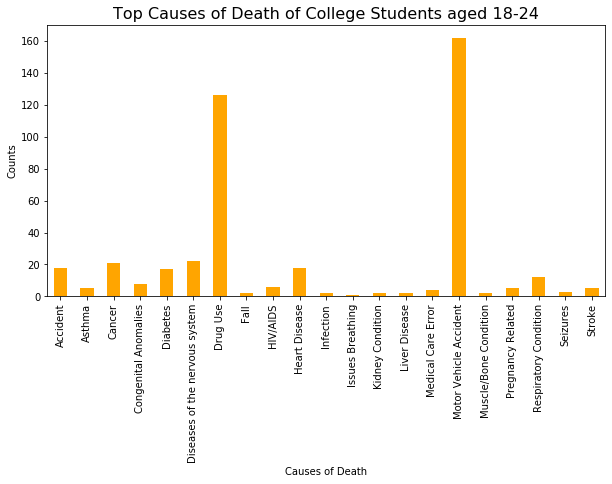

In [5]:
miles_group = miles.groupby(['group']).count()['age']
miles_group.plot(kind = 'bar', figsize = [10,5], color='orange')
plt.title('Top Causes of Death of College Students aged 18-24', fontsize = 16)
plt.xlabel('Causes of Death')
plt.ylabel('Counts')
plt.show()

<h3>Inference from Visualisation 1: <br>
The top causes of death of college students is Motor Vehicle Accidents and Drug Use followed by Cancer, Diabetes, and Heart Diseases.</h3>

<h3>Visualization 2:</h3>
<p>The intent of this graph is to highlight the count of Alcohol related disorders from the cause column in the 'Drug Use' group. However, many empty cells exist in the column (119) and the count of Alcohol related disorders is just 1, which is not representative of the sample size.</p>

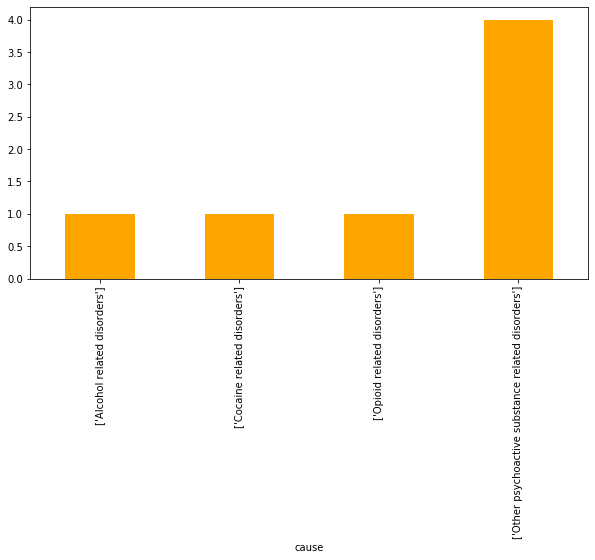

In [6]:
miles_drug = miles.loc[miles['group'] == 'Drug Use'].reset_index()
miles_drug = miles_drug[miles_drug.cause != '[]'] #Drop the empty [] which are 119 in number
miles_drug_group = miles_drug.groupby(['cause']).count()['age']
miles_drug_group.plot(kind = 'bar', color='orange', figsize = [10,5])

In [7]:
miles_drug['cause'].value_counts() 

['Other psychoactive substance related disorders']    4
['Alcohol related disorders']                         1
['Cocaine related disorders']                         1
['Opioid related disorders']                          1
Name: cause, dtype: int64

### Inference: 
Visualization 1 is a better graph for Miles<br>
The second graph does not represent the Alcohol drinking sample size completely, thus it is better to not show a prediction like this to Miles, our target user.
<hr>

<h2>A2: Jonas</h2>

In [8]:
jonas = data.loc[(data['age'] > 65) & (data['relationship_status'] == 'Widowed')].reset_index()
jonas.describe()

,index,Unnamed: 0,age,education,month_of_death,day_of_week_of_death
count,34156.000000,3.415600e+04,34156.000000,34156.000000,34156.000000,34156.000000
mean,49816.750059,1.477869e+06,86.788236,3.482990,6.260950,4.000849
std,28856.965804,6.900268e+05,7.844920,1.946008,3.523438,2.000476
min,0.000000,1.200000e+02,66.000000,1.000000,1.000000,1.000000
25%,24790.500000,9.091255e+05,82.000000,3.000000,3.000000,2.000000
50%,49761.000000,1.512632e+06,88.000000,3.000000,6.000000,4.000000
75%,74739.000000,2.038548e+06,92.000000,4.000000,9.000000,6.000000
max,99999.000000,2.718028e+06,111.000000,9.000000,12.000000,7.000000


In [9]:
data['relationship_status'].unique()

array(['Widowed', 'Single', 'Married', 'Divorced', 'Unkown'], dtype=object)

### The maximum age of living for widowed men is 74 years. Thus the dataset was channelised better using this calculation.

### Visualization 1:  3 Levels of Control
An interactive bar chart which lets Jonas pick his relationship status, his gender and his age to view his likely causes of death.

In [24]:
%matplotlib notebook

Dropdown(description='Choose Gender', options=('M', 'F'), value='M')

Dropdown(description='Choose Relationship Status', options=('Single', 'Married', 'Divorced', 'Widowed', 'Unkow…

IntSlider(value=45, description='Choose Age', max=111, style=SliderStyle(handle_color='orange'))

<IPython.core.display.Javascript object>


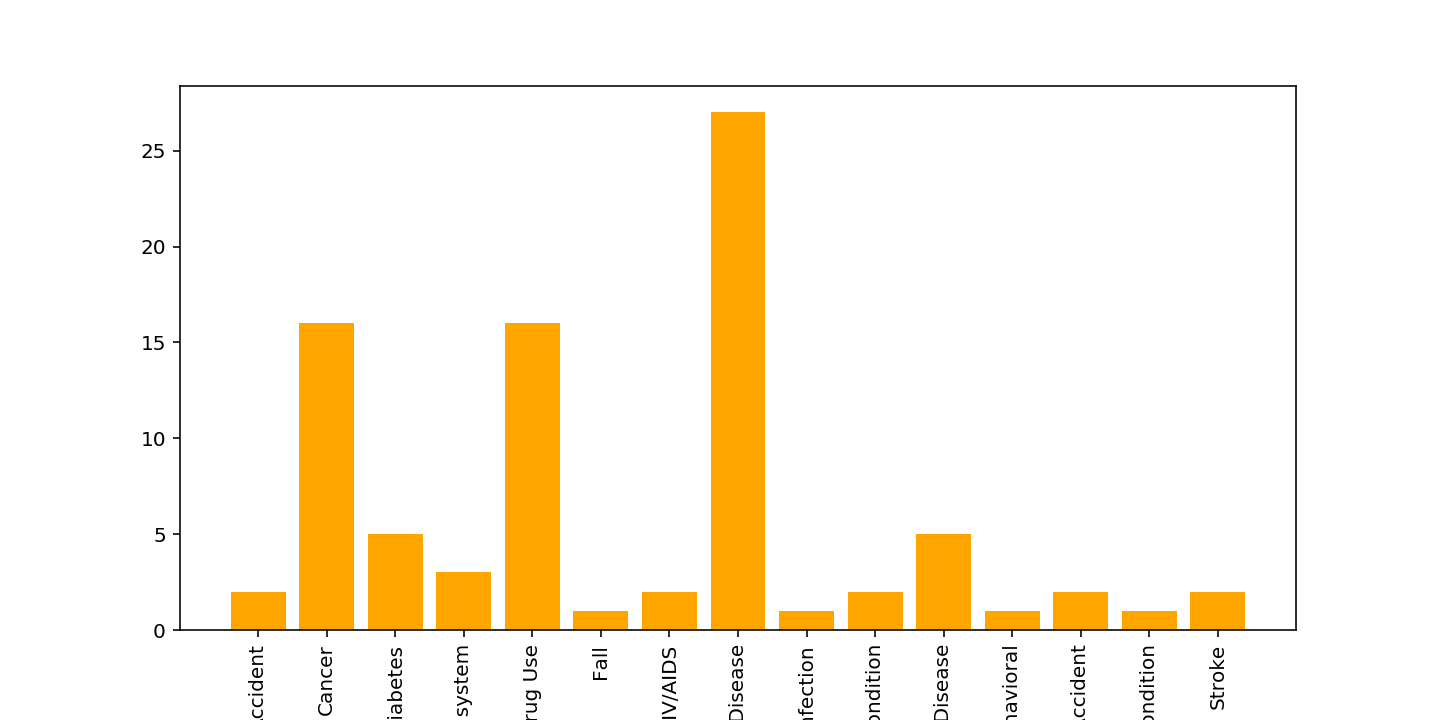

In [25]:
gender = widgets.Dropdown(
    options=["M", "F"],
    value='M',
    description='Choose Gender',
)

relationship = widgets.Dropdown(
    options=['Single', 'Married', 'Divorced', 'Widowed', 'Unkown'],
    value='Single',
    description='Choose Relationship Status',
)

age = widgets.IntSlider(min=0, max=111, value=45, description='Choose Age', continuous_update=True)
age.style.handle_color = 'orange'

display(gender)
display(relationship)
display(age)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
fig.gca().set(title='Frequency Histogram of Top 4 Causes of Death by Age', ylabel='Frequency of death', xlabel = "Causes of Death")

def response(change):
    ax.cla()
    a = age.value
    r = relationship.value
    g = gender.value
    
    x = data.loc[(data['age'] == a) & (data['relationship_status'] == r) & (data['sex'] == g)]
    jonas_group = x.groupby(['group']).count()['age'].reset_index(name = 'counts')

    plt_x = jonas_group['group']
    plt_y = jonas_group['counts']
    ax.bar(plt_x, plt_y, color = 'orange')
    plt.xticks(rotation = 90)

gender.observe(response, names="value")
relationship.observe(response, names="value")
age.observe(response, names="value")

### Inference 
This visualization is the most customizable for Jonas.
***

<h3>Visualization 2:</h3>
<p>Since Jonas is 72, the age range chosen to show him personalised predictions is 65-74 years. According to Medicare, a senior is 65 years or older. Furthermore, the data has been selected on the bases of the 'relationship status of Jonas' i.e. Widowed. The graph type is a countplot, which divides the Top Causes of Death by Gender. In the appendix, there are test visualizations in which the data has further been selected on the level of education, but the graphs do not seem to have much of a difference.</p>

In [11]:
jonas = data.loc[(data['age'] > 65) & (data['age'] < 74) & (data['relationship_status'] == 'Widowed')].reset_index()

<IPython.core.display.Javascript object>


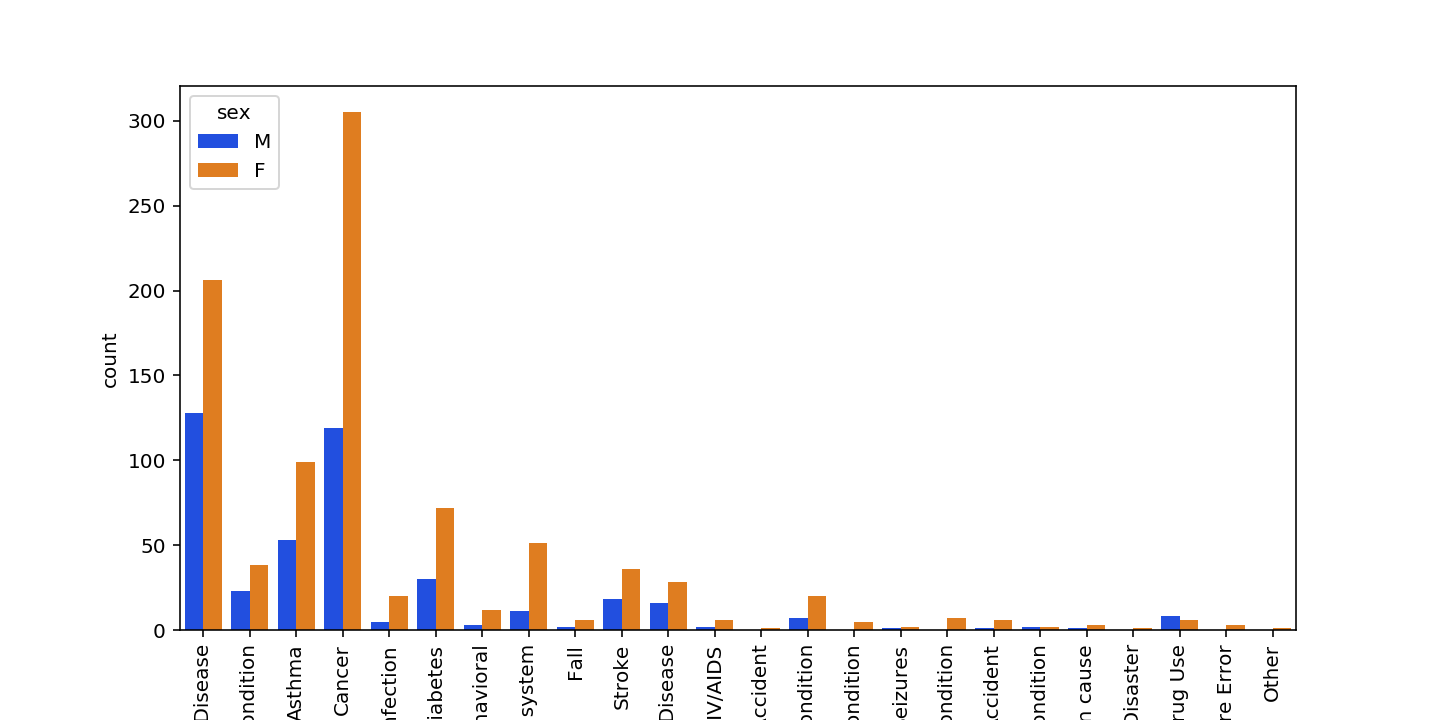

In [26]:
jonas_group = jonas.groupby(['group']).count()['age'].reset_index(name = 'counts')
plt.figure(figsize=(10,5))
sns.countplot(x='group', hue='sex', data=jonas, palette="bright")
plt.xticks(rotation=90)
plt.show()

<h3>Inference for Visualization 1:</h3>
<p>This graph shows that for widowed men in the age range of 65 -74, the leading cause of death is heart disease followed by caancer, followed by Asthma. This is different for females, cancer being the leading cause of death. Thus a countplot which segregates the causes of death by gender, is better than bucketing them in the same group.</p>

### Visualization 2

<IPython.core.display.Javascript object>


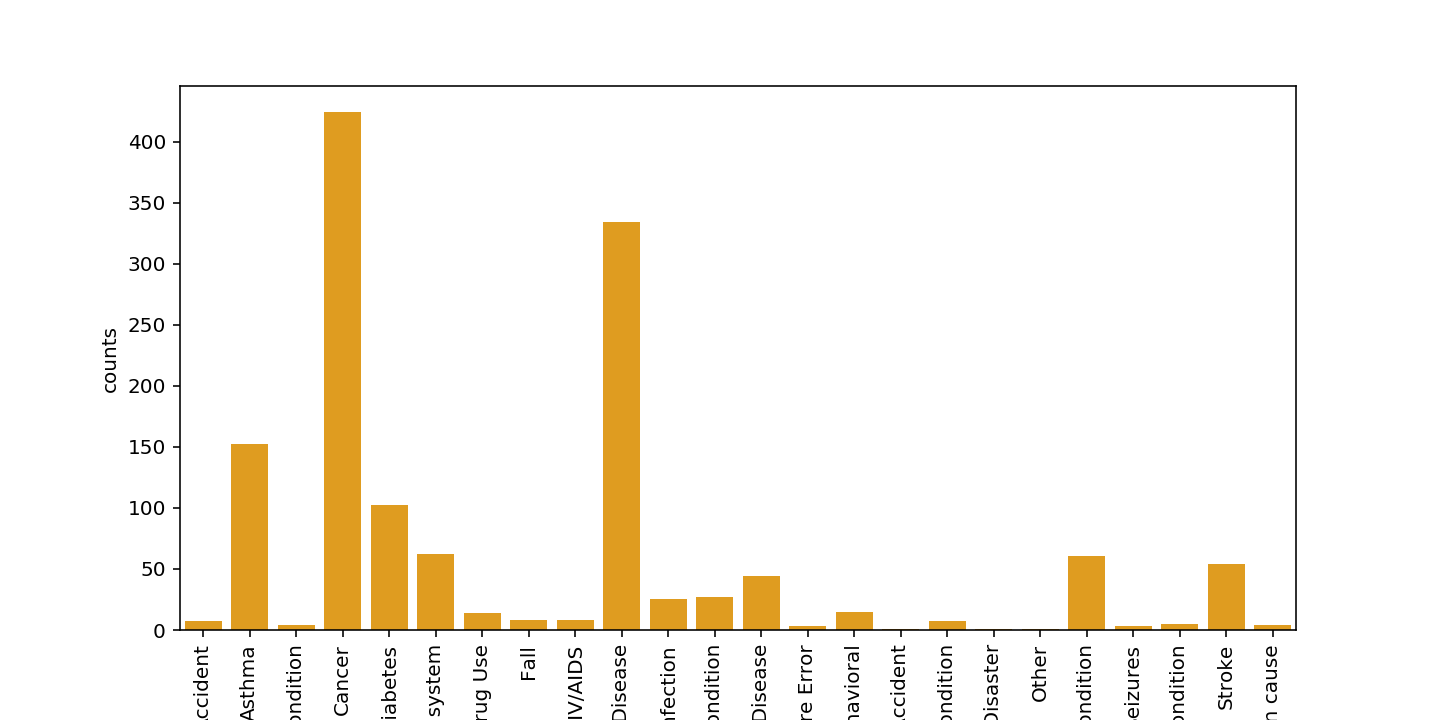

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='group', y='counts', data=jonas_group, color = 'orange')
plt.xticks(rotation=90)
plt.show()

## A3: Alma

### Visualization 1

In [28]:
alma = data.loc[(data['group'] == 'Cancer') & (data['sex'] == 'F') & (data['age'] > 30) & (data['age'] < 50)].reset_index()
alma.head()

,index,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
0,48,1956933,49,F,Korean,4.0,4,3,Natural Causes,Married,C11,['Malignant neoplasm of nasopharynx'],Cancer
1,50,540950,41,F,Black,3.0,4,5,Natural Causes,Married,C92,['Myeloid leukemia'],Cancer
2,98,1395973,39,F,White,3.0,10,2,Natural Causes,Married,C16,['Malignant neoplasm of stomach'],Cancer
3,130,2377936,36,F,White,3.0,8,6,Natural Causes,Married,C50,['Malignant neoplasm of breast'],Cancer
4,138,743539,42,F,White,4.0,11,5,Natural Causes,Single,C50,['Malignant neoplasm of breast'],Cancer


<IPython.core.display.Javascript object>


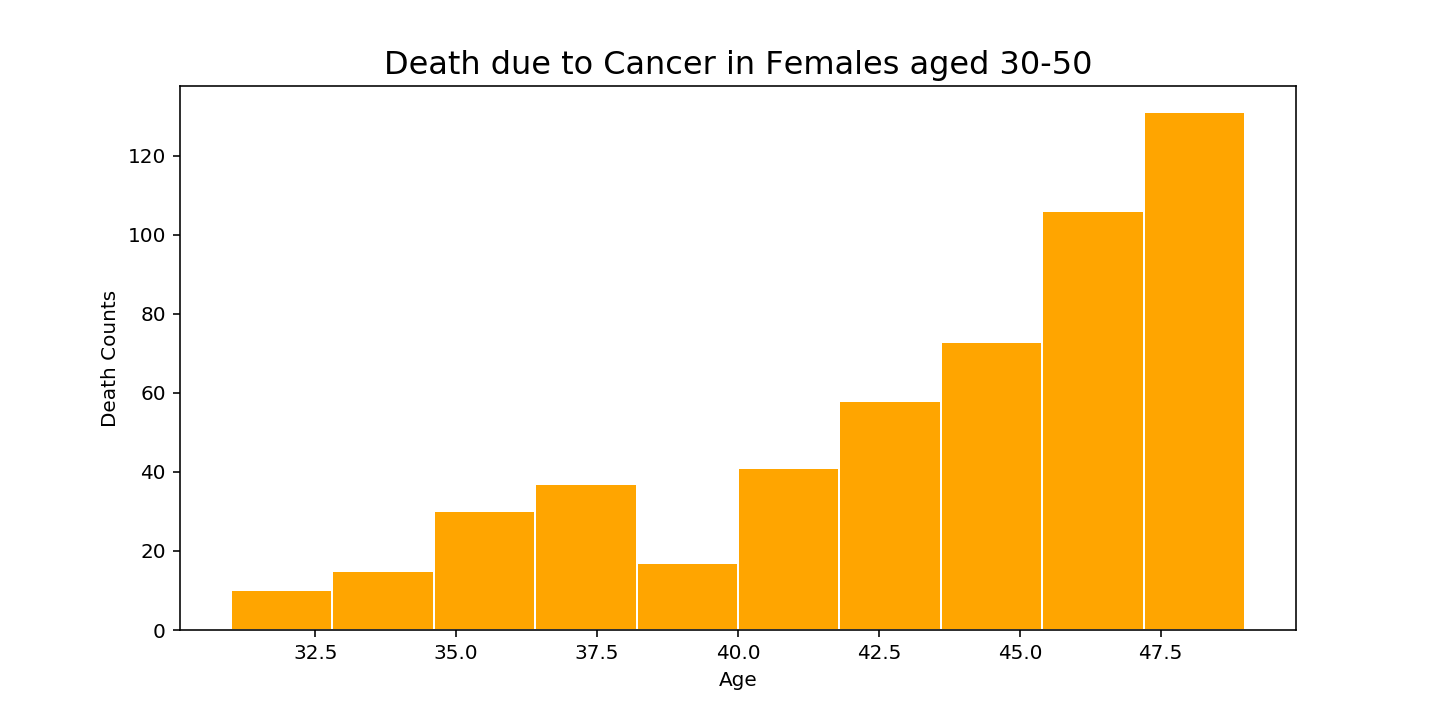

In [31]:
plt.figure(figsize=(10,5))
plt.hist(alma['age'], color = 'orange', edgecolor = 'white')
plt.title('Death due to Cancer in Females aged 30-50', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Death Counts')
plt.show()

### Visualization 2: Interactive Crossfilter
This has been made to better display to Alma that based on her age group, what are the types of cancer that are most applicable, and what she is likely going to encounter as she grows older. The following string values displayed below are queried to check and are later assigned a number for building an interactive crossfilter.

In [16]:
alma2 = data.loc[(data['group'] == 'Cancer') & (data['sex'] == 'F')].reset_index()
alma2['cause'].unique()

array(["['Malignant melanoma of skin']", "['Non-follicular lymphoma']",
       "['Malignant neoplasm of gallbladder']",
       "['Malignant neoplasm without specification of site']",
       "['Malignant neoplasm of nasopharynx']", "['Myeloid leukemia']",
       "['Malignant neoplasm of breast']",
       "['Malignant neoplasm of colon']",
       "['Malignant neoplasm of meninges']", "['Follicular lymphoma']",
       "['Malignant neoplasm of stomach']",
       "['Malignant neoplasm of bronchus and lung']",
       "['Malignant neoplasm of liver and intrahepatic bile ducts']",
       "['Malignant neoplasm of cervix uteri']",
       "['Malignant neoplasm of other connective and soft tissue']",
       "['Lymphoid leukemia']", "['Malignant neoplasm of bladder']",
       "['Malignant neoplasm of ovary']",
       "['Malignant neoplasm of rectosigmoid junction']",
       "['Malignant neoplasm of brain']",
       "['Other specified and unspecified types of non-Hodgkin lymphoma']",
       "['Leuke

### Converting string values to numerical values
String values in the causes column replaced with integer numbers to build an interactive crossfilter. Replacement method found here: http://martinhjelm.github.io/2017/11/12/Pandas-Replacing-Strings-In-A-Column/

In [17]:
causes = alma2['cause'].unique().tolist()
mapping = dict( zip(causes,range(len(causes))) )
alma2.replace({'cause': mapping},inplace=True)
alma2['cause'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

### Process for creating interactive crossfilter

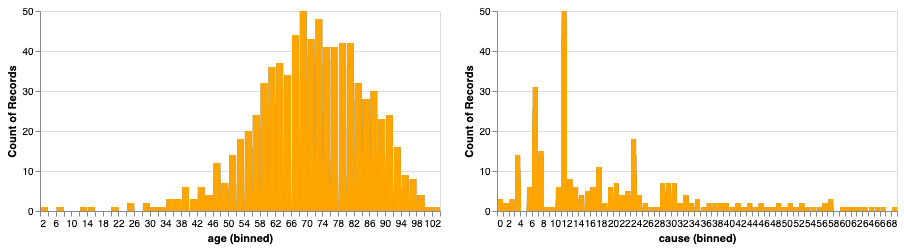

In [18]:
brush = alt.selection(type='interval', encodings=['x'])
data=alma2.sample(5000)

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart(data).mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=100)),
#     y=alt.Y('value', aggregate='average', type='quantitative', title = 'Total Count')
    y='count()',
    tooltip = ["age", "cause"]
).properties(
    width=400,
    height=200
)

# blue background with selection
background = base.add_selection(brush)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('orange')
).transform_filter(brush)

# layer the two charts & repeat
alt.layer(
    background, 
    highlight, 
    data=alma2.sample(5000)
).repeat(
    column=["age", "cause"])

***

## B. 
Which visualization from A do you think is the most successful design? What visualization techniques did you use? [3 points]

### Answer
Jonas's visualization is the most successful design since it offers the highest degree of customization. The technique used is widgets in combination with a graph, and modifying the widgets changes the bar values in correspondence. The user can select age, relationship status and gender to have causes of death that are tailored to them.
***

## C.
Given your visualizations in A, what would be good questions for a user to ask a personalized visualization from this dataset? What would be some bad questions that a personalized visualization (with this dataset alone) cannot answer? [7 points]

Assuming that we are considering Jonas's visualization for framing the questions.
### Good Questions
1. What are the top causes of death for a woman nearing her menopause?
2. What causes of death do retired men need to be careful of and take precautions against?
3. What are the the gender specific causes of death for individuals over 40 years of age? 

### Bad Questions
1. What are the top causes of death for transgenders?
2. What is the likelihood of someone in their youth dying of asthma over other causes of death, given that they have a chronic asthma? 
3. What is count of people who had cancer but died of drug abuse or a road accident? 
***

## D.
If users like those in A visit the interactive tool on the CDC website, what information (e.g. age or race) would you have them put in to show the most relevant death visualization and why? [10 points]

### Evaluating users like A: 
1. Miles: Causes of Death, Subcauses of a particular cause
2. Jonas: Age, Relationship Status, Gender
3. Alma: Gender, particular values from the 'group' column, Age

### Generalising for similar users who might visit the portal: Information they should input:
#### Group of Death on X Axis
If group of death is on the x axis the following information can be inputted by user. Here the visualisation is most likely to be a bar graph and the y axis is the corresponding counts. 
1. #### Age: 
This is because it was observed that causes of death vary differently based on how old one is, for instance for a very old person, them dying of a heart disease is much more likely than someone who is a teen. 
2. #### Gender: 
It was observed that cancer is a leading cause of death for women over the age of 65, v/s for men it is heart disease for the same age. Thus inputting gender is likely to give gender specific results. 
3. #### Relationship Status: 
It was found during analysis that widowed men do not live beyond the age of 74, suggesting that relationship status also matters in determining the cause of death, if not in all cases, but in some cases for sure. 

#### Group of Death is an input/ selector
If group of death itself is the input/ value to be selected by the user, age or gender/ or some other column could be the x axis. The type of visualizations that can be made include: 
1. Age on x axis: The visualization in this case is most likely to be histogram. 
2. Gender on x Axis: Bar chart.
3. Age on x axis, and the graph is further used to drill down upon causes of death in that group: Interactive crossfilter. 
4. Relationship status on x axis: Bar chart showing counts of deaths by relationship status due to a particular 'group'

## E.
For each column in the dataset, describe how you would bin the data for a good user experience and why. For instance, ‘age’ can be not binned (exact numbers) or binned into ‘child’, ‘young adult’, ‘adult’, ‘elder’... or many other bin choices. [10 points]

#### Answer
According to Wikipedia, Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall in a given small interval, a bin, are replaced by a value representative of that interval, often the central value. It is a form of quantization.(https://en.wikipedia.org/wiki/Data_binning ) Thus, keeping this as a reference, binning has been suggest based on bucketing or by an exact value.

<table>
    <tr>
        <th text = "align:right;">Column</th>
        <th text = "align:right;">Description</th>
        <th text = "align:right;">Choices for Binning data for a good UX</th>
    </tr>
    <tr>
        <td>id</td>
        <td>random numerical id unique to a person</td>
        <td>Cannot be binned. An id is a unique identifier and binning by id is not feasible because more often than not, we also reset index when we part a dataset.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>age in years</td>
        <td>Cannot be binned by exact numbers or binned into ‘child’, ‘young adult’, ‘adult’, ‘elder’. This is because even in age, there are multiple categories like moms, veterans, college goers, early career professionals, thus making a bin by age might not give the user a good idea of what to pick. Age is best represented on a slider, or a numerical input. However, age can be binned in intervals of 5 years, making it easier for user to pick in a dropdown or say increasing a slider in steps of 5.</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>sex, restricted to F (female) or M (male), at time of death</td>
        <td>Can be binned by exact value. This is because the dataset only has 2 genders listed, and it is easy for a user to pick on or the other. However, this dataset is not inclusive, and when more columns for sex are added, then can also be binned by exact value.</td>
    </tr>
    <tr>
        <td>race</td>
        <td>Including: ['White', 'Black', 'Korean', 'Vietnamese', 'Indian', 'Native American', 'Hawaiian', 'Chinese', 'Japanese', 'other Asian or Pacific Islander', 'Filipino', 'Samoan','Guamanian']
        </td>
        <td>Can be binned by exact value. If the counts of certain column values are not too high, they can be grouped and binned. For e.g. Indian, Korean, Vietnamese etc can be binned as 'Asian'. I also noticed that Hispanic is completely missing, which would perhaps get added if we add more values to the dataset.</td>
    </tr>
    <tr>
        <td>education</td>
        <td>1 ... 8th grade or less, 2 ... 9 - 12th grade, no diploma, 3 ... high school graduate or GED completed, 4 ... some college credit, but no degree, 5 ... Associate degree, 6 ... Bachelor’s degree, 7 ... Master’s degree, 8 ... Doctorate or professional degree, 9 ... Unknown<br>
        </td>
        <td>Can be binned by exact value.</td>
    </tr>
    <tr>
        <td>month_of_death</td>
        <td>numerical value of month</td>
        <td>Can be binned by exact value. For further simplification, one bin could be a combination of 2 months. </td>
    </tr>
        <tr>
        <td>day_of_week_of_death</td>
        <td>1 ... Sunday 
            2 ... Monday 
            3 ... Tuesday 
            4 ... Wednesday 
            5 ... Thursday
            6 ... Friday 
            7 ... Saturday 
            9 ... Unknown
        </td>
        <td>Can be binned by exact value.</td>
    </tr>
        <tr>
        <td>manner</td>
        <td>either ‘Natural Causes’ or ‘Accident’</td>
        <td>Can be binned by exact value. This is because only 2 unique values are listed for manner of death.</td>
    </tr>
        <tr>
        <td>relationship_status</td>
        <td>S ... Never married or Single 
            M ... Married 
            W ... Widowed 
            D ... Divorced 
            U ... Unknown
        </td>
        <td>Can be binned by exact value.</td>
    </tr>    
    <tr>
        <td>icd_code</td>
        <td>The exact cause of death as standardized by international medical classification codes. See https://icd.codes/icd10cm for reference</td>
        <td>Since the icd codes for causes of death have around or more than 68 unique values, it doesn't make sense to bin them. Additionally, they are also related to a particular group, thus can be referenced if someone want to dig deeper into the causes of a group.</td>
    </tr>    
    <tr>
        <td>cause</td>
        <td>The exact cause of death, a text description (when available) of the icd code</td>
        <td>Since the causes of death have around or more than 68 unique values, it doesn't make sense to bin them. Additionally, they are also related to a particular group, thus can be referenced if someone want to dig deeper into the causes of a group.</td>
    </tr>    
    <tr>
        <td>Group</td>
        <td>General category for cause of death, including:
       ['Heart Disease', 'Respiratory Condition', 'Bladder Condition',
       'Cancer', 'Stroke', 'Motor Vehicle Accident', 'Seizures',
       'Infection', 'Mental or Behavioral', 'Liver Disease',
       'Birth Condition', 'Diseases of the nervous system', 'Diabetes',
       'Kidney Condition', 'Issues Breathing', 'Asthma',
       'Muscle/Bone Condition', 'Medical Care Error', 'Drug Use',
       'Accident', 'Fall', 'Congenital Anomalies', 'HIV/AIDS',
       'Unkown cause', 'Fire', 'Skin Condition', 'Other',
       'Natural Disaster', 'Pregnancy Related', 'Eye Condition',
       'Stomach or Bowel Issues', 'Male Reproductive Condition',
       'Female Reproductive Condition', 'Military Situation',
       'Disturbance of Behavior or Senses', 'Issues with Movement',
       'Heat Exposure', 'Urinary Abdominal Issues']
        </td>
        <td>This has multiple discrete column values some of which are similar as well. The data here can be binned by unique column values and some of them can be combined such as 'Male Reproductive Condition' and 'Female Reproductive Condition' since they are sex specific. Similarly, 'Unknown cause' and 'Other' can be grouped and considered one bin. This will help to reduce the total number of bins.</td>
    </tr>    
</table>
<hr>

## Appendix: Trials and Errors

### Two ways of selecting rows based on column value

In [19]:
value_list = ['20']
miles = data.loc[data['age'].isin(value_list)]

In [20]:
#OR
data = pd.read_csv("data/death_causes.csv") # create dataframe
miles = data.loc[data['age'] == 20]
miles.head()

,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
9,363001,20,M,White,2.0,11,5,Accident,Single,V89,"['Motor- or nonmotor-vehicle accident, type of...",Motor Vehicle Accident
1712,2707122,20,M,White,1.0,10,3,Natural Causes,Single,Q87,['Other specified congenital malformation synd...,Congenital Anomalies
2573,739133,20,M,Black,3.0,5,4,Natural Causes,Single,J45,['Asthma'],Asthma
2941,1881926,20,M,White,2.0,10,5,Accident,Single,X42,[],Drug Use
4658,1958567,20,M,White,3.0,5,1,Accident,Single,X44,[],Drug Use


### Graph for Jonas, which is also selected on the basis of relationship status

<IPython.core.display.Javascript object>


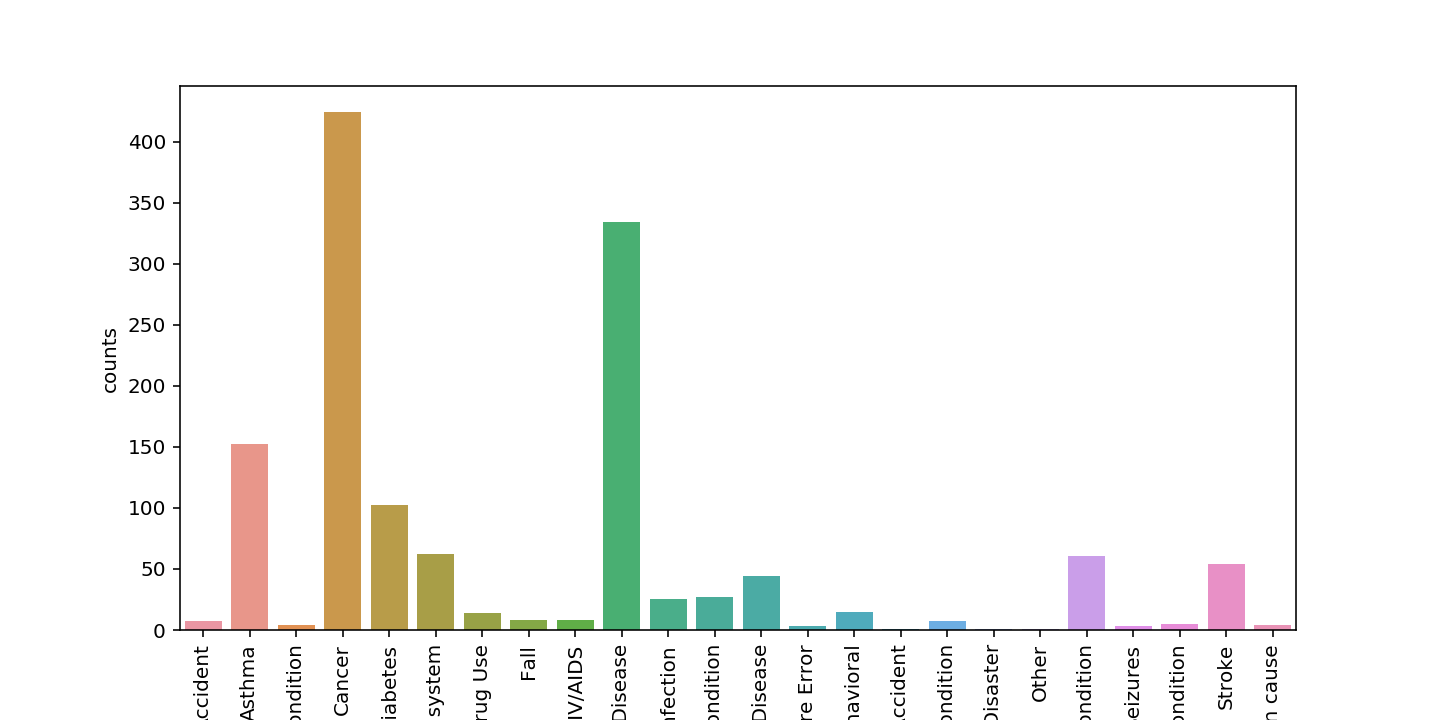

In [32]:
jonas = data.loc[(data['age'] > 65) & (data['age'] < 75) & (data['relationship_status'] == 'Widowed') & (data['education'] ==3)].reset_index()
jonas_group = jonas.groupby(['group']).count()['age'].reset_index(name = 'counts')
plt.figure(figsize=(10,5))
sns.barplot(x='group', y='counts', data=jonas_group)
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


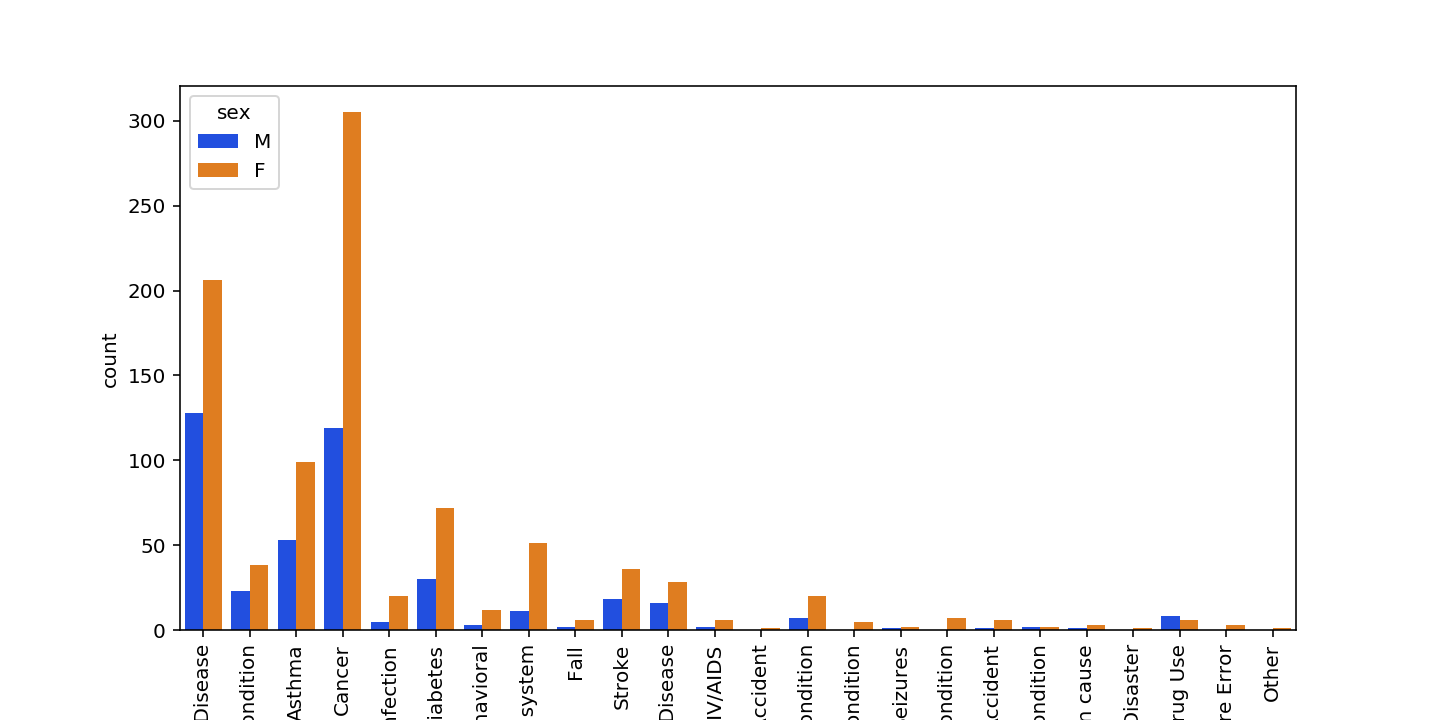

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='group', hue='sex', data=jonas, palette="bright")
plt.xticks(rotation=90)
# plt.ylim(65,75)
plt.show()

### Failed eventHandler for Miles

<IPython.core.display.Javascript object>


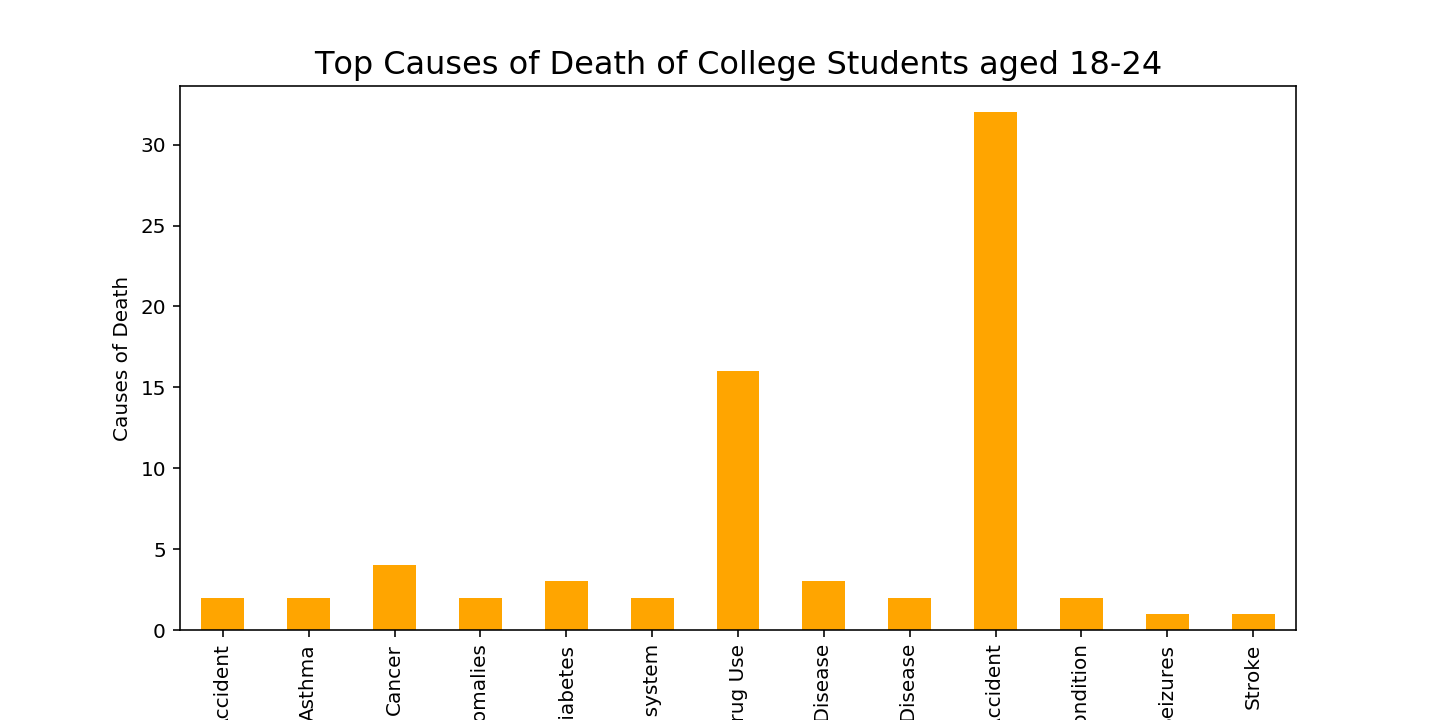

Textarea(value='', description='event:', placeholder='Cause of Death')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.


In [34]:
miles_group = miles.groupby(['group']).count()['age']
fig, ax = plt.subplots()
ax = miles_group.plot(kind = 'bar', figsize = [10,5], color='orange')
plt.title('Top Causes of Death of College Students aged 18-24', fontsize = 16)
plt.xlabel('Counts')
plt.ylabel('Causes of Death')
mplcursors.cursor(hover=True)

# Create and display textarea widget
txt = widgets.Textarea(
    value='',
    placeholder='Cause of Death',
    description='event:',
    disabled=False
)
display(txt)

plt.show(ax)

# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

# https://stackoverflow.com/questions/43396282/cursor-location-and-pixel-value-in-a-jupyter-notebook-inline-image?rq=1